In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# independent features and dependent features


In [16]:
# independent features
x=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width ','petal length' ,'petal width'])

In [17]:
# dependent features
y = iris['target']

In [18]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
# apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0

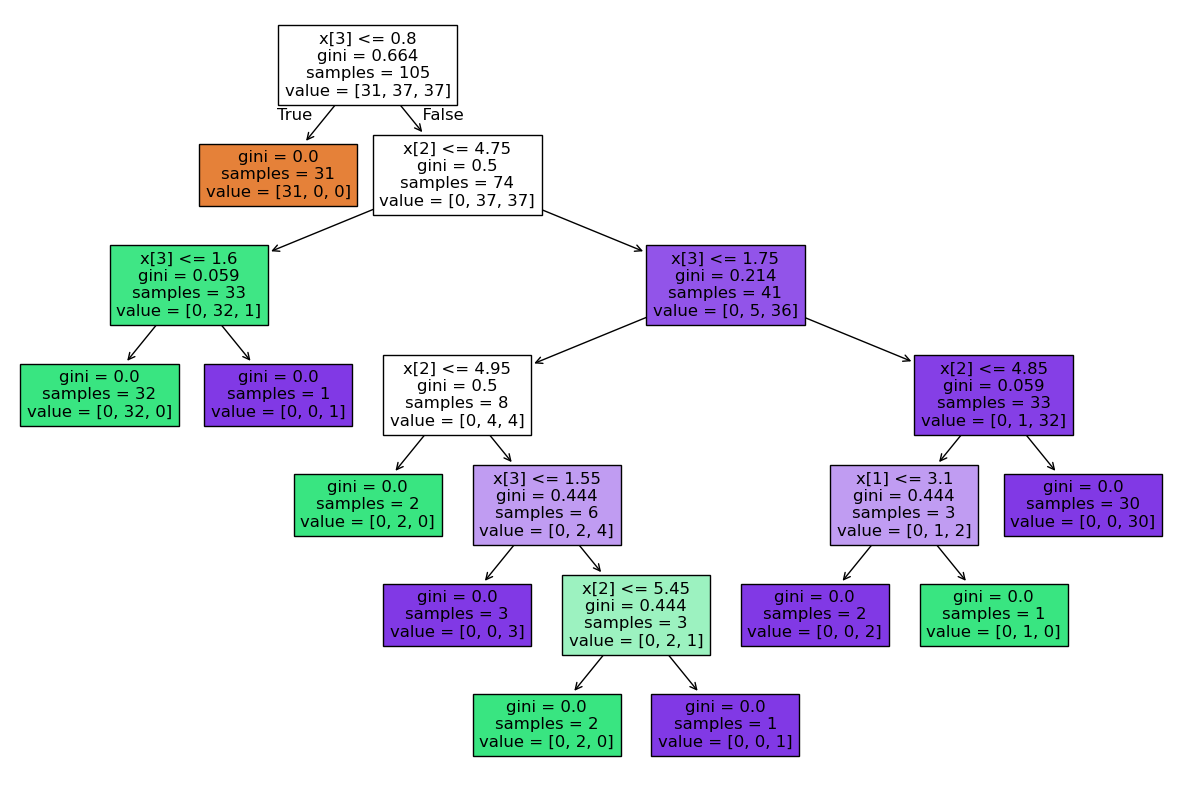

In [48]:
# visualization the decison tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)


In [49]:
y_pred=dtree.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [52]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# prepruning and hyperparameter tuning

In [30]:
param= {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson','gini','entropy'],
    'splitter':['best','random'],
    'max_features':['sqrt','log2',None],
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'max_features':['sqrt','log2','auto'],
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
treemodel = DecisionTreeClassifier()

In [34]:
grid = GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [36]:
import warnings 
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson', 'gini',
                                       'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [37]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [39]:
grid.best_score_

0.9523809523809523

In [40]:
y_pred = grid.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [43]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [46]:
score = accuracy_score(y_test,y_pred)
score

0.9777777777777777